In [ ]:
#method to update task dataframes with new columns priority etc.

import pandas as pd

# Load existing data
df = pd.read_csv("tasks.csv")

# add new columns 
new_columns = {
    "priority": 3,
    "category": "General",
    "due_date": pd.NaT,
    "completed_at": pd.NaT
}

for col, default in new_columns.items():
    if col not in df.columns:
        df[col] = default

# Save updated CSV
df.to_csv("tasks.csv", index=False)

df.head()

In [ ]:
#quick helper method to view some tasks to see if above method was successful.

import pandas as pd
# Checking new add method works.
df = pd.read_csv("tasks.csv", parse_dates=["created_at", "due_date", "completed_at"])
df.head(10)

In [ ]:
# quick helper method to show some task metrics.

def task_summary(df):
    print("***Task Summary: ***\n")

    #total tasks
    print(f"Total tasks: {len(df)}")

    #completed vs need completion
    completed = df["completed"].sum()
    print(f"Completed: {completed}")
    print(f"Not Completed: {len(df) - completed}\n")

    #by category
    print("Tasks by Category")
    for category, count in df["category"].value_counts().items():
        print(f" - {category}: {count}")
    print()
    
    #by priority
    print("Tasks by Priority: ")
    for priority, count in df["priority"].value_counts().sort_index().items():
        print(f" - Priority Level {priority}: {count}")

df = pd.read_csv("tasks.csv", parse_dates=["created_at", "due_date", "completed_at"])
task_summary(df)

In [ ]:
#import libraries and set graph style for the following plot methods. 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
#histogram for displaying tasks by category.
def plot_tasks_by_category(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
    plt.title("Number of tasks by Category")
    plt.xlabel("Category")
    plt.ylabel("Number of Tasks")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#histogram for displaying 
def plot_completed_rate_by_category(df):
    plt.figure(figsize=(8, 5))
    #calculate the completionrate.
    completion_rate = df.groupby('category')['completed'].mean().sort_values(ascending=False)
    sns.barplot(x=completion_rate.index, y=completion_rate.values)
    plt.title("Task Completion Rate by Category") #title
    plt.xlabel("Category") #x-axis label
    plt.ylabel("Completion Rate") #y-axis label
    plt.ylim(0, 1) #set y limits.
    plt.xticks(rotation=45) #set ticks
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_tasks_over_time(df):
    plt.figure(figsize=(10, 5))
    df['created_date'] = df['created_at'].dt.date 
    recent_tasks = df[df['created_date'] >= (df['created_date'].max() - pd.Timedelta(days=30))] #get tasks from before 30 days ago.
    task_counts = recent_tasks.groupby('created_date').size() # groups tasks by size
    task_counts.plot(kind='line', marker='o') #plot as line graph.
    plt.title("Tasks Created Over Last 30 Days")#set title
    plt.xlabel("Date")#set x label
    plt.ylabel("Number of Tasks") #set y label
    plt.xticks(rotation=45) #set ticks
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_completion_pie(df):
    completion_Counts = df['completed'].value_counts()
    labels = ['Completed', 'Incomplete'] #pie chart labels.
    colors = ['#4CAF50', '#F44336'] #standard red/green.

    plt.figure(figsize=(6 , 6))
    plt.pie(completion_Counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90) #set plot data.
    plt.title("Overall Task Completion Status") #set title
    plt.axis('equal') #make a perfect circle.
    plt.show()


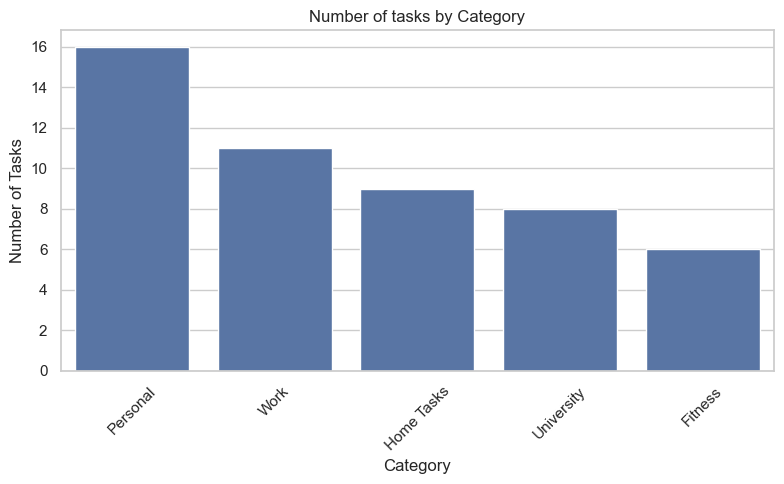

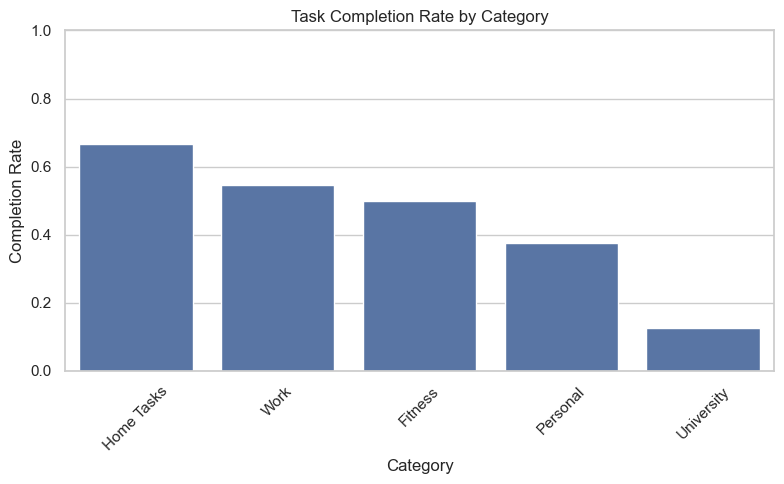

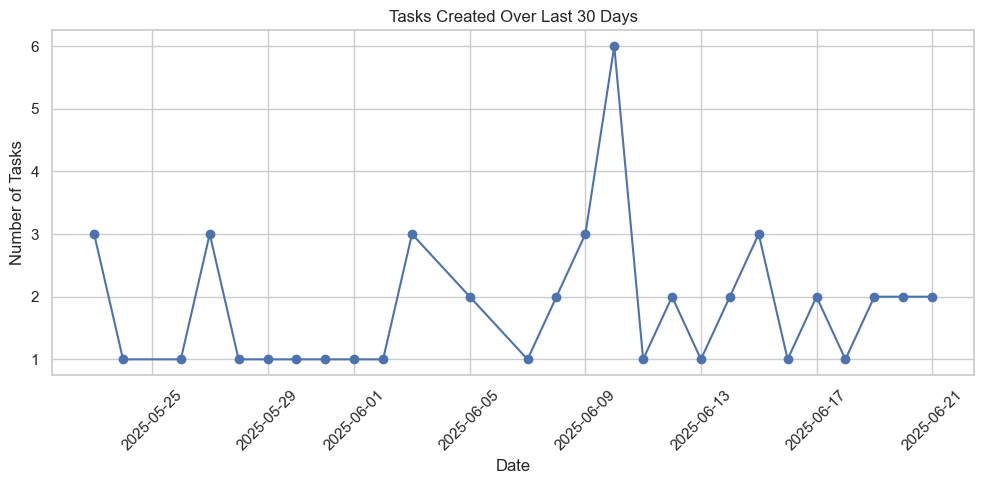

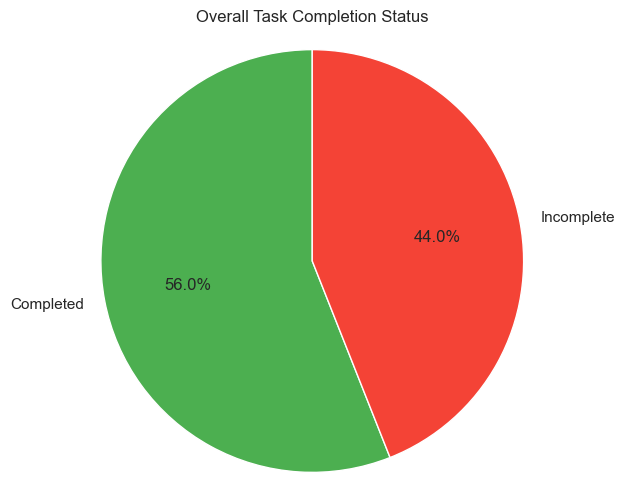

In [21]:
plot_tasks_by_category(df)
plot_completed_rate_by_category(df)
plot_tasks_over_time(df)
plot_completion_pie(df)